# Task 3: Fundamental Diagram

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Define file path

In [401]:
# Group 2 US101SB Contour
# 10-19
volume_contour_10_19_path = "Group 2 US101SB/volume_contour_10-19.csv"
speed_contour_10_19_path = "Group 2 US101SB/speed_contour_10-19.csv"
density_contour_10_19_path = "Group 2 US101SB/density_contour_10-19.csv"
v_fitted_10_19_path = "Group 2 US101SB/v_fitted_10-19.csv"

# 10-26
volume_contour_10_26_path = "Group 2 US101SB/volume_contour_10-26.csv"
speed_contour_10_26_path = "Group 2 US101SB/speed_contour_10-26.csv"
density_contour_10_26_path = "Group 2 US101SB/density_contour_10-26.csv"
v_fitted_10_26_path = "Group 2 US101SB/v_fitted_10-26.csv"

# SR_91_Bottleneck_B_150-200
# 0831 - 0901
volume_contour_0831_0901_path = "SR_91_Bottleneck_B_150-200/volume_contour_0831-0901.csv"
speed_contour_0831_0901_path = "SR_91_Bottleneck_B_150-200/speed_contour_0831-0901.csv"
density_contour_0831_0901_path = "SR_91_Bottleneck_B_150-200/density_contour_0831-0901.csv"
v_fitted_0831_0901_path = "SR_91_Bottleneck_B_150-200/v_fitted_0831-0901.csv"

# 0907 - 0908
volume_contour_0907_0908_path = "SR_91_Bottleneck_B_150-200/volume_contour_0907-0908.csv"
speed_contour_0907_0908_path = "SR_91_Bottleneck_B_150-200/speed_contour_0907-0908.csv"
density_contour_0907_0908_path = "SR_91_Bottleneck_B_150-200/density_contour_0907-0908.csv"
v_fitted_0907_0908_path = "SR_91_Bottleneck_B_150-200/v_fitted_0907-0908.csv"

## 2. Load data

You can change the value of `DATE_FOR_ANALYSIS` to get result for different dataset.

* For US101 before evacuation, set `DATE_FOR_ANALYSIS` to `10-19`
* For US101 during evacuation, set `DATE_FOR_ANALYSIS` to `10-26`
* For SR-91 before evacuation, set `DATE_FOR_ANALYSIS` to `0831-0901`
* For SR-91 during evacuation, set `DATE_FOR_ANALYSIS` to `0907-0908`

In [402]:
# US101SB
# 10-19
volume_contour_10_19 = pd.read_csv(volume_contour_10_19_path)
speed_contour_10_19 = pd.read_csv(speed_contour_10_19_path)
density_contour_10_19 = pd.read_csv(density_contour_10_19_path)
# 10-26
volume_contour_10_26 = pd.read_csv(volume_contour_10_26_path)
speed_contour_10_26 = pd.read_csv(speed_contour_10_26_path)
density_contour_10_26 = pd.read_csv(density_contour_10_26_path)

# SR_91_Bottleneck_B_150-200
# 0831 - 0901
volume_contour_0831_0901 = pd.read_csv(volume_contour_0831_0901_path)
speed_contour_0831_0901 = pd.read_csv(speed_contour_0831_0901_path)
density_contour_0831_0901 = pd.read_csv(density_contour_0831_0901_path)
# 0907 - 0908
volume_contour_0907_0908 = pd.read_csv(volume_contour_0907_0908_path)
speed_contour_0907_0908 = pd.read_csv(speed_contour_0907_0908_path)
density_contour_0907_0908 = pd.read_csv(density_contour_0907_0908_path)

# Speed Contour for analysis
DATE_FOR_ANALYSIS = "10-26"
# DATE_FOR_ANALYSIS = "10-19"
# DATE_FOR_ANALYSIS = "0907-0908"
# DATE_FOR_ANALYSIS = "0831-0901"
if DATE_FOR_ANALYSIS == "10-19":
    speed_contour = speed_contour_10_19
    volume_contour = volume_contour_10_19
    density_contour = density_contour_10_19
    v_fitted_path = v_fitted_10_19_path
elif DATE_FOR_ANALYSIS == "10-26":
    volume_contour = volume_contour_10_26
    speed_contour = speed_contour_10_26
    density_contour = density_contour_10_26
    v_fitted_path = v_fitted_10_26_path
elif DATE_FOR_ANALYSIS == "0831-0901":
    volume_contour = volume_contour_0831_0901
    speed_contour = speed_contour_0831_0901
    density_contour = density_contour_0831_0901
    v_fitted_path = v_fitted_0831_0901_path
elif DATE_FOR_ANALYSIS == "0907-0908":
    volume_contour = volume_contour_0907_0908
    speed_contour = speed_contour_0907_0908
    density_contour = density_contour_0907_0908
    v_fitted_path = v_fitted_0907_0908_path


## 3. Explore the speed contour

In [403]:
# Set date as DateTimeIndex
speed_contour['date'] = pd.to_datetime(speed_contour['date'])
speed_contour.set_index('date', inplace=True)
# Replace any value greater than 80 with 80
speed_contour = speed_contour.applymap(lambda x: 80 if x > 80 else x)
speed_contour.fillna(-1, inplace=True)

/var/folders/6g/xqgvnv4s1h95kfz0bd14h3_h0000gn/T/ipykernel_33207/603311892.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  speed_contour = speed_contour.applymap(lambda x: 80 if x > 80 else x)


In [404]:
# Set the jammed speed threshold 
SPEED_JAMMED = 50
# Find stations with speed less than speed threshold, which is jammed condition.
stations = [col for col in speed_contour.columns 
            if ((speed_contour[col] < SPEED_JAMMED) & (speed_contour[col] > 0)).any()]
speed_contour_jammed = speed_contour[stations]

/var/folders/6g/xqgvnv4s1h95kfz0bd14h3_h0000gn/T/ipykernel_33207/3269162682.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_labels = pd.date_range(start='00:00:00', end='23:59:00', freq='H')


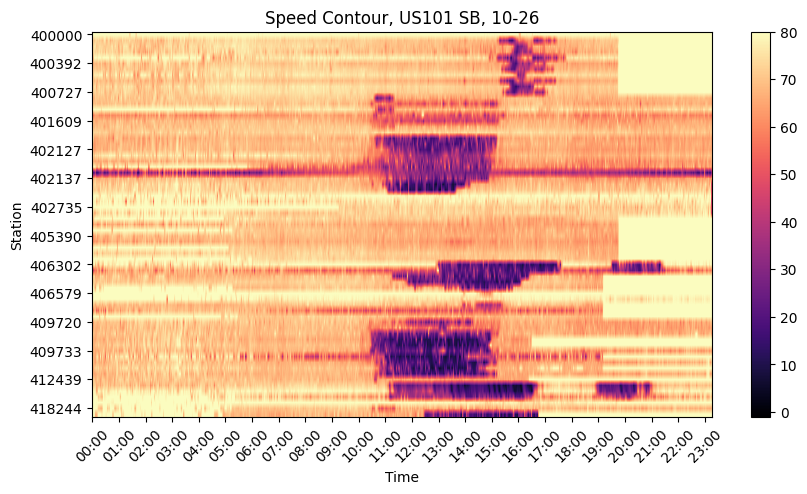

In [405]:
dates = speed_contour_jammed.index

# Plot the speed contour as heatmap, date as x-axis, stations as y-axis, cell value as color (speed)
plt.figure(figsize=(10, 5))

# Determine the time range and labels based on the date for analysis
if DATE_FOR_ANALYSIS in ["10-19", "10-26"]:  # 24 hours for US101SB
    plt.imshow(speed_contour_jammed.T, aspect='auto', cmap='magma', origin='upper', interpolation='bilinear')
    hourly_labels = pd.date_range(start='00:00:00', end='23:59:00', freq='H')
    xticks = np.arange(0, len(dates), 120)
    title = f'Speed Contour, US101 SB, {DATE_FOR_ANALYSIS}'
    # Set x-axis labels
    plt.xticks(ticks=xticks, labels=hourly_labels.strftime('%H:%M'), rotation=45)
elif DATE_FOR_ANALYSIS in ["0907-0908"]:  # 48 hours for SR_91_Bottleneck_B_150-200
    plt.imshow(speed_contour_jammed.T, aspect='auto', cmap='magma', origin='lower', interpolation='bilinear')
    hourly_labels = pd.date_range(start='2017-09-07 00:00:00', end='2017-09-08 23:59:00', freq='2H')
    xticks = np.arange(0, len(dates) - 1, 120)
    title = f'Speed Contour, SR-91, {DATE_FOR_ANALYSIS}'
    # Set x-axis labels
    plt.xticks(ticks=xticks, labels=hourly_labels.strftime('%H:%M'), rotation=45)
elif DATE_FOR_ANALYSIS in ["0831-0901"]:
    plt.imshow(speed_contour_jammed.T, aspect='auto', cmap='magma', origin='lower', interpolation='bilinear')
    title = f'Speed Contour, SR-91, {DATE_FOR_ANALYSIS}'
    xticks = np.arange(0, len(dates), 60)
    hourly_labels = [dates.strftime('%H:%M')[i] for i in xticks]
    plt.xticks(ticks=xticks, labels=hourly_labels, rotation=45)

# Set y-axis labels
plt.yticks(ticks=np.arange(0, len(stations), 5), labels=stations[::5])

# Show color map
plt.colorbar()

# Set title and labels
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Station')
plt.show()

## 4. Plot Fundamental Diagram for One Station

In this section, you will select a specific station that is being monitored during an evacuation. The goal is to analyze the traffic flow characteristics at this station by plotting a fundamental diagram. This diagram typically shows the relationship between traffic flow (vehicles per hour) and traffic density (vehicles per kilometer).

To achieve this, you will:
1. Choose a station from the available data.
2. Plot undamental diagram to the observed data.

This analysis will help in understanding the traffic behavior at the chosen station and can be used to improve evacuation planning and management.

In [406]:
# Get a random station
# random_number = np.random.randint(0, len(stations))
# random_station = stations[random_number]

# Set station for optimization, you can change the station according the speed contour plot.
if DATE_FOR_ANALYSIS in ["10-19", "10-26"]:
    random_station = '410547'
elif DATE_FOR_ANALYSIS in ["0831-0901", "0907-0908"]:
    random_station = '4080'

In [407]:
# Get the speed, volume, and density of the random station
random_station_speed = speed_contour[random_station]
random_station_volume = volume_contour[random_station]
random_station_density = density_contour[random_station]

In [408]:
# Create a DataFrame for the random station
random_station_df = pd.DataFrame({'v': random_station_speed.values, 'q': random_station_volume.values, 'k': random_station_density.values})
random_station_df = random_station_df.dropna() # The NaN values are from the missing data at specific time
random_station_df = random_station_df[random_station_df['v'] > 0] # Remove the zero speed values
random_station_df.head()

,v,q,k
0,80.0,0.0,0.000000
1,65.0,1.0,0.001086
2,67.0,3.0,0.003338
3,80.0,0.0,0.000000
4,74.5,6.0,0.006125


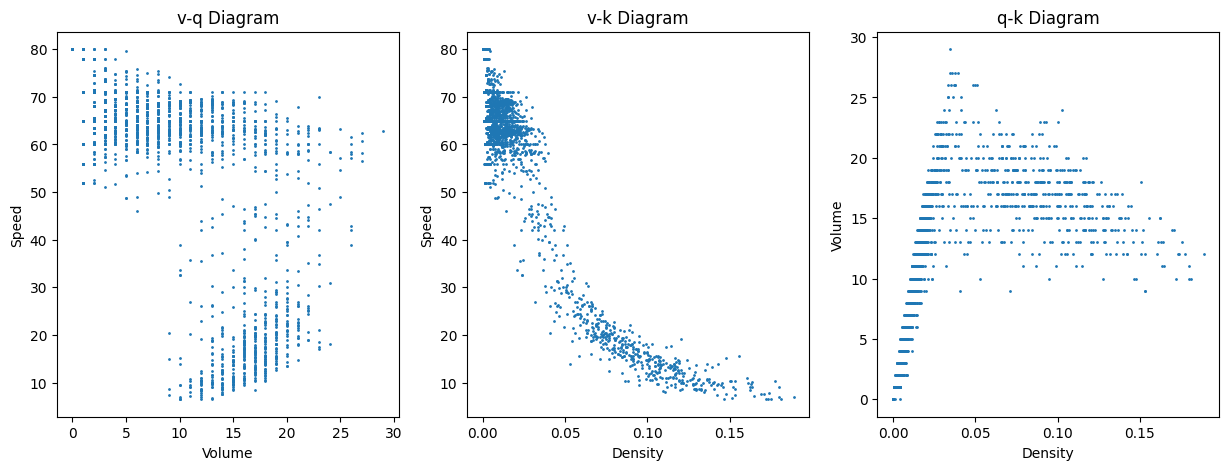

In [409]:
# Plot v-q, v-k, and q-k diagrams for one station
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(random_station_df['q'], random_station_df['v'], s=1)
plt.xlabel('Volume')
plt.ylabel('Speed')
plt.title('v-q Diagram')

plt.subplot(132)
plt.scatter(random_station_df['k'], random_station_df['v'], s=1)
plt.xlabel('Density')
plt.ylabel('Speed')
plt.title('v-k Diagram')

plt.subplot(133)
plt.scatter(random_station_df['k'], random_station_df['q'], s=1)
plt.xlabel('Density')
plt.ylabel('Volume')
plt.title('q-k Diagram')

plt.show()


# Task 4: Optimization

In [410]:
from scipy.optimize import curve_fit

## 1. Curve Fitting

In [411]:
# Get v, k from random station
random_station_df = random_station_df.sort_values(by='k')
v = random_station_df['v'].to_numpy()
k = random_station_df['k'].to_numpy()
print(v)

[80.         80.         80.         ...  9.09090909  6.5
  7.        ]


In [412]:
# Define the single-regime model to fit the data
def greenshields(k, v_f, k_jam):
    return v_f * (1 - k / k_jam)

def drake(k, v_f, k_m):
    return v_f * np.exp(-0.5 * (k / k_m)**2)

def five_pl(k, v_f, v_b, k_c, theta_1, theta_2):
    return v_b + (v_f - v_b) / (1 + np.exp((k - k_c)/theta_1))**theta_2

def s3(k, v_f, k_c, m):
    return v_f / (1 + (k/k_c)**m)**(2/m)

In [413]:
# Deinfe the Mean Squared Error (MSE) function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [414]:
# Fit the greenshields model
popt, pcov = curve_fit(greenshields, k, v, bounds=([0, 0], [np.inf, np.inf]))
v_f, k_jam = popt
mse_greenshields = mse(v, greenshields(k, v_f, k_jam))
print(f'v_f: {v_f:.2f}, k_jam: {k_jam:.2f}') # 2 decimal places
print(f'MSE: {mse_greenshields:.2f}')

# Fit the drake model
popt, pcov = curve_fit(drake, k, v, bounds=([0, 0], [np.inf, np.inf]))
v_f, k_m = popt
mse_drake = mse(v, drake(k, v_f, k_m))
print(f'v_f: {v_f:.2f}, k_m: {k_m:.2f}')
print(f'MSE: {mse_drake:.2f}')

# Fit the five_pl model
popt, pcov = curve_fit(five_pl, k, v, bounds=([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf]))
v_f, v_b, k_c, theta_1, theta_2 = popt
mse_five_pl = mse(v, five_pl(k, v_f, v_b, k_c, theta_1, theta_2))
print(f'v_f: {v_f:.2f}, v_b: {v_b:.2f}, k_c: {k_c:.2f}, theta_1: {theta_1:.2f}, theta_2: {theta_2:.2f}')
print(f'MSE: {mse_five_pl:.2f}')

# Fit the s3 model, with bournds for m, 1<=m<=8.53
popt, pcov = curve_fit(s3, k, v, bounds=([0, 0, 1], [np.inf, np.inf, 8.53]))
v_f, k_c, m = popt
mse_s3 = mse(v, s3(k, v_f, k_c, m))
print(f'v_f: {v_f:.2f}, k_c: {k_c:.2f}, m: {m:.2f}')
print(f'MSE: {mse_s3:.2f}')


v_f: 69.91, k_jam: 0.13
MSE: 52.99
v_f: 68.18, k_m: 0.05
MSE: 42.69
v_f: 78.22, v_b: 11.11, k_c: 0.04, theta_1: 0.02, theta_2: 1.18
MSE: 33.25
v_f: 69.13, k_c: 0.05, m: 2.06
MSE: 35.73


## 2. Plot the curve

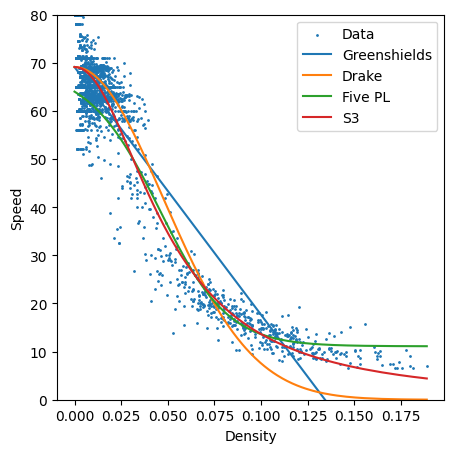

In [415]:
# Plot the fitted models in one single plot
plt.figure(figsize=(5, 5))
plt.scatter(k, v, s=1, label='Data')
plt.plot(k, greenshields(k, v_f, k_jam), label='Greenshields')
plt.plot(k, drake(k, v_f, k_m), label='Drake')
plt.plot(k, five_pl(k, v_f, v_b, k_c, theta_1, theta_2), label='Five PL')
plt.plot(k, s3(k, v_f, k_c, m), label='S3')
plt.xlabel('Density')
plt.ylabel('Speed')
plt.ylim(0, 80) # Set the y-axis limit from 0 to 80
plt.legend()
plt.show()


## 3. Create data from t-test

In [416]:
# Calculate the fitted speed for all stations
v_fitted_greenshields = greenshields(k, v_f, k_jam)
v_fitted_drake = drake(k, v_f, k_m)
v_fitted_five_pl = five_pl(k, v_f, v_b, k_c, theta_1, theta_2)
v_fitted_s3 = s3(k, v_f, k_c, m)

# Create a DataFrame for the fitted speed, and save it to a CSV file
v_fitted = pd.DataFrame({'date': DATE_FOR_ANALYSIS, 'greenshields': v_fitted_greenshields, 'drake': v_fitted_drake, 'five_pl': v_fitted_five_pl, 's3': v_fitted_s3})
v_fitted.to_csv(v_fitted_path, index=False)